<a href="https://colab.research.google.com/github/ruanwensheng/Abnormal-Activities-Detection-Using-YOLOv11/blob/main/Fire_Smoke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jul  9 06:58:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!unzip -q /content/fire.zip -d /content/custom_data

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [4]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/custom_data',
      'train': 'train/images',
      'val': 'test/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/custom_data
train: train/images
val: test/images
nc: 2
names:
- fire
- smoke


In [5]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=12 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 94.3MB/s]
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=12, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, 

In [6]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=custom_data/test/images save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/828 /content/custom_data/test/images/0000064_jpg.rf.07ef82e82cd62273db16267b55882ef2.jpg: 640x640 (no detections), 22.8ms
image 2/828 /content/custom_data/test/images/0000081_jpg.rf.80909843398befaef0934264c0160822.jpg: 640x640 (no detections), 15.3ms
image 3/828 /content/custom_data/test/images/0000155_jpg.rf.7c82ad21309c27935dd83670cdceac38.jpg: 640x640 (no detections), 15.3ms
image 4/828 /content/custom_data/test/images/0000177_jpg.rf.1530f1c974762203f9e7f7a1fdf1a8db.jpg: 640x640 (no detections), 15.3ms
image 5/828 /content/custom_data/test/images/0000199_jpg.rf.2e02ebfd3322c513b79452fb4e7e522a.jpg: 640x640 (no detections), 15.3ms
image 6/828 /content/custom_data/test/images/0000269_jpg.rf.bb28ff96c73507598f5468b2c8b2dc4d.jpg: 640x640 (no detections), 15.3ms
image 7/828 /content/custom_data/test/images/000092_

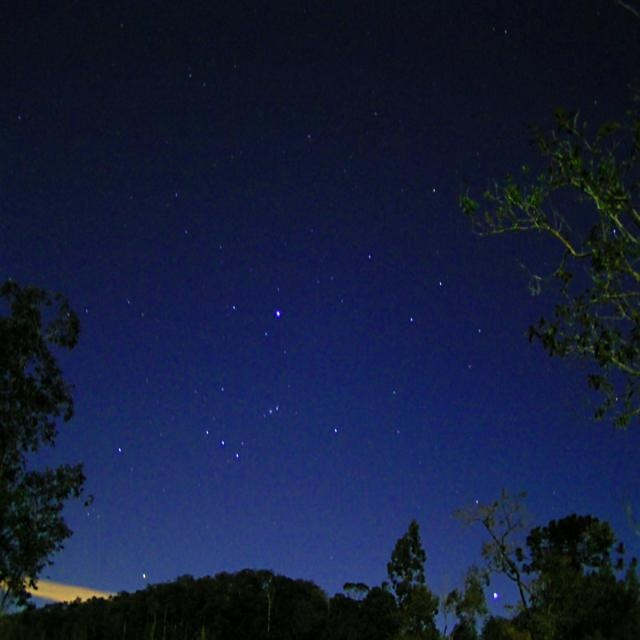

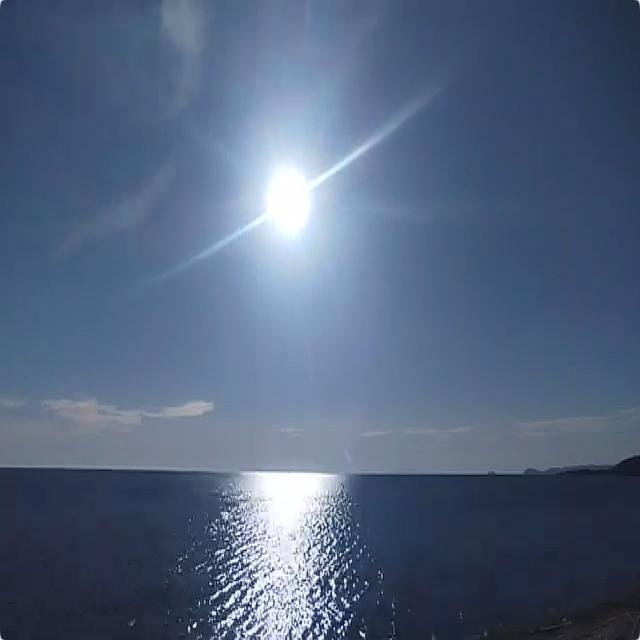

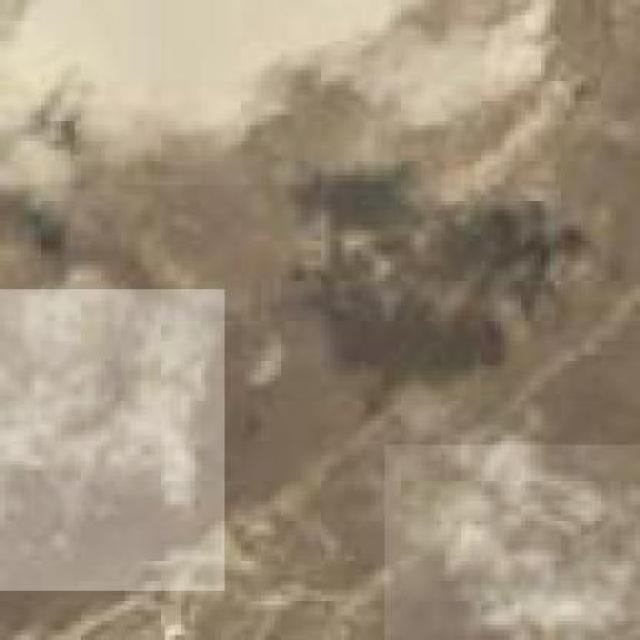

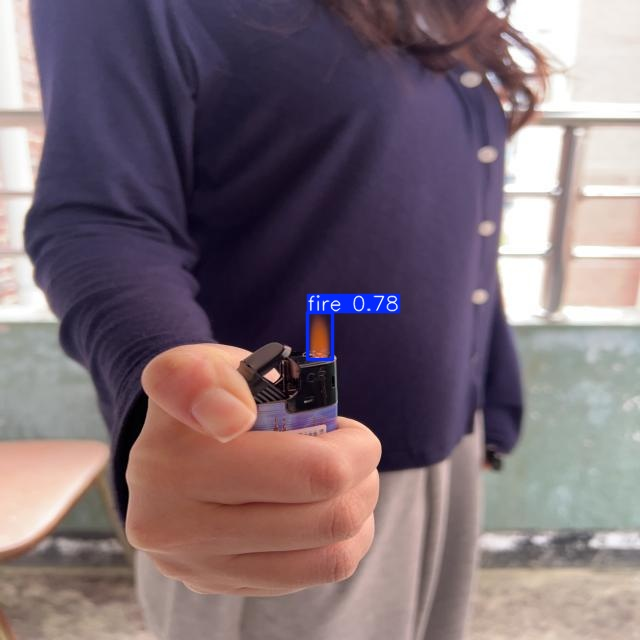

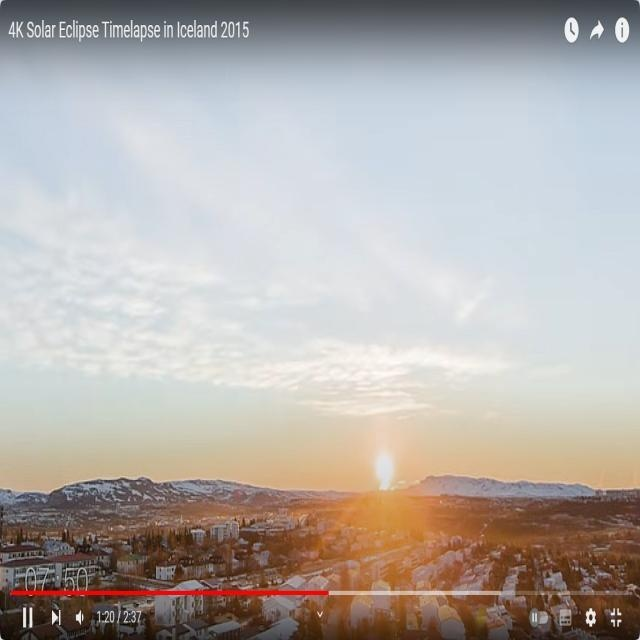

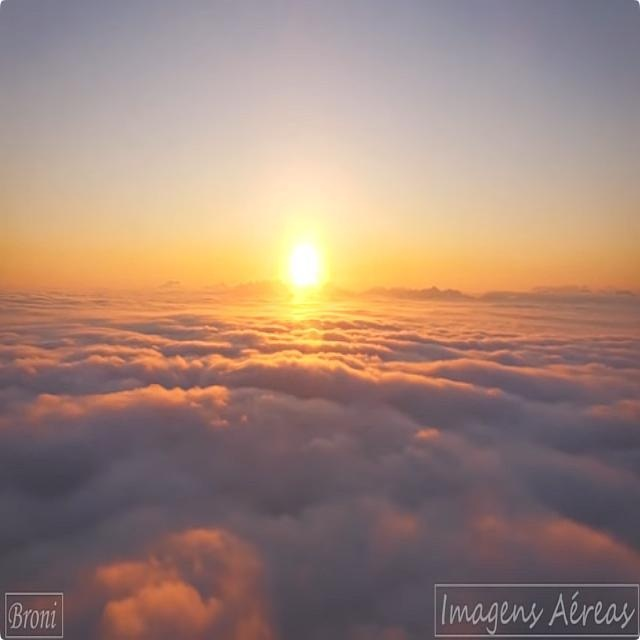

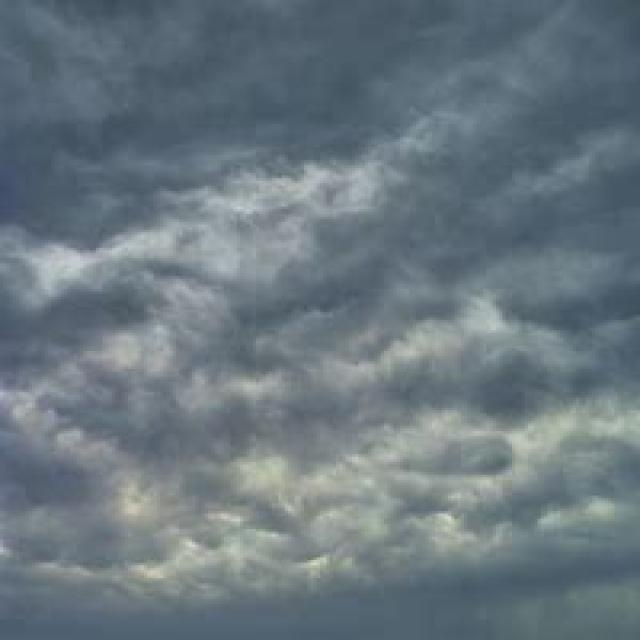

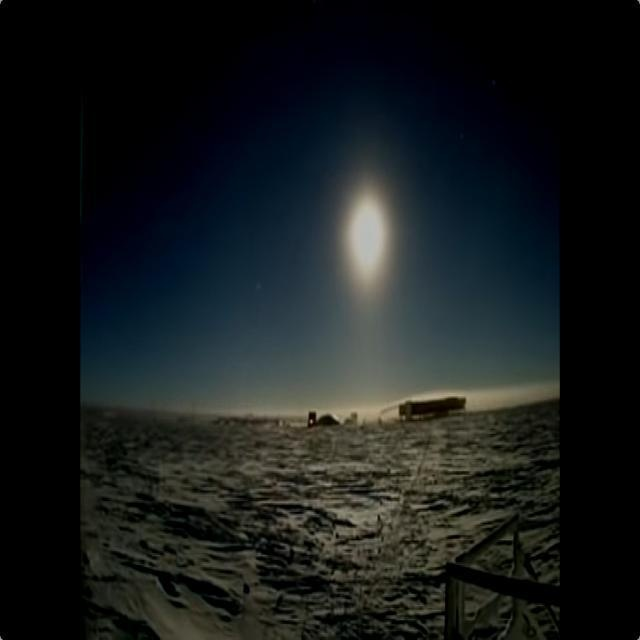

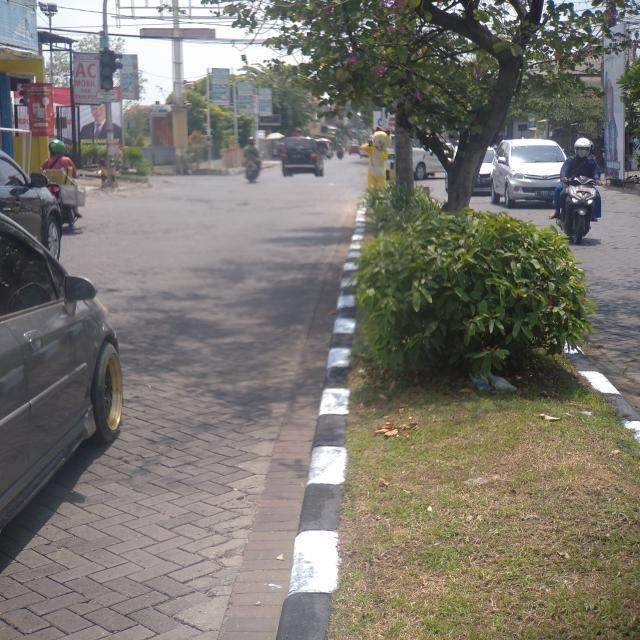

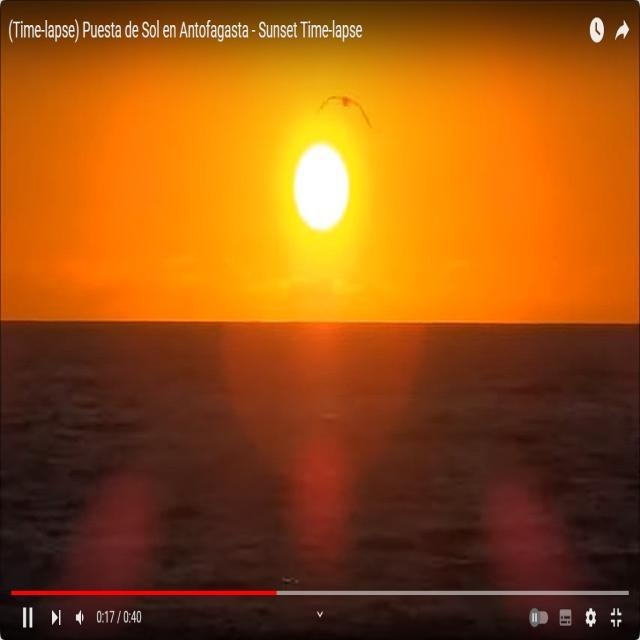

In [10]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[10:20]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [8]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/args.yaml (deflated 53%)
  adding: train/BoxPR_curve.png (deflated 12%)
  adding: train/train_batch1.jpg (deflated 6%)
  adding: train/confusion_matrix_normalized.png (deflated 31%)
  adding: train/train_batch832.jpg (deflated 12%)
  adding: train/labels_correlogram.jpg (deflated 35%)
  adding: train/train_batch2.jpg (deflated 3%)
  adding: train/labels.jpg (deflated 26%)
  adding: train/BoxR_curve.png (deflated 12%)
  adding: train/BoxP_curve.png (deflated 13%)
  adding: train/val_batch0_pred.jpg (deflated 13%)
  adding: train/train_batch830.jpg (deflated 14%)
  adding: train/results.png (deflated 6%)
  adding: train/train_batch831.jpg (deflated 9%)
  adding: train/val_batch1_pred.jpg (deflated 6%)
  adding: train/BoxF1_curve.png (deflated 12%)
  adding: train/val_batch2_labels.jpg (deflated 9%)
  adding: train/results.csv (deflated 57%)
  adding: train/confusion_matrix.png (deflated 33%

In [ ]:
import os
import shutil

# Define source and destination paths
source_data_path = '/content/custom_data'
source_model_path = '/content/my_model'
destination_path = '/content/drive/MyDrive/lp_detection_project'

# Create the destination directory in Google Drive if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the data and model folders
try:
    shutil.copytree(source_data_path, os.path.join(destination_path, 'custom_data'))
    print(f'Successfully copied {source_data_path} to {destination_path}/custom_data')
except FileExistsError:
    print(f'{destination_path}/custom_data already exists. Skipping copy.')

try:
    shutil.copytree(source_model_path, os.path.join(destination_path, 'my_model'))
    print(f'Successfully copied {source_model_path} to {destination_path}/my_model')
except FileExistsError:
    print(f'{destination_path}/my_model already exists. Skipping copy.')

Successfully copied /content/custom_data to /content/drive/MyDrive/lp_detection_project/custom_data
Successfully copied /content/my_model to /content/drive/MyDrive/lp_detection_project/my_model
